## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 05.02.2020

__Дедлайн:__ 15.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а в качестве бонусного задания сможете реализовать алгоритм KNN.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}})\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. Все баллы сверх обязательных (9 в первой части и 12 во второй) идут в бонус. Таким образом, за это домашнее задание можно получить 4 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Для успешного выполнения этой части вам необходимо пройти все `assert`'ы.

In [100]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [101]:
def result_mark(weights: np.array, marks: np.array) -> int:
    result = weights @ marks
    return np.round(np.sum(result))

In [102]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [103]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [104]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [105]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [106]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [107]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    result = np.abs(np.array(array1 - array2))
    return np.array(np.where(result < precision))[0]

In [108]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [109]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [110]:
def block_matrix(block: np.array) -> np.array:
    matrix = np.append(block, block, axis=0)
    return np.append(matrix, matrix, axis=1)

In [111]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [112]:
def diag_prod(matrix: np.array) -> int:
    diag = np.diagonal(matrix)
    return np.prod(diag[diag != 0])

In [113]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [114]:
def normalize(matrix: np.array) -> np.array:
    average = np.sum(matrix, axis=0) / np.size(matrix, 1)
    average = [average] * np.size(matrix, 0)
    sq = np.std(matrix, axis=0)
    sq = sq[sq != 0]
    return (matrix - average) / sq

In [115]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [116]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [117]:
def antiderivative(coefs: np.array) -> np.array:
    return np.polyint(np.poly1d(coefs)).coef

In [118]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [119]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [120]:
def make_symmetric(matrix: np.array) -> np.array:
    symmetric = np.transpose(matrix) + matrix
    symmetric[np.diag_indices_from(symmetric)] //= 2
    return symmetric

In [121]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [122]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [123]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return [np.arange(a, b + 1)] * m

In [124]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [125]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [126]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    numerator = np.sum(vec1 @ vec2)
    denominator = np.sqrt(np.sum(vec1 @ vec1)) * np.sqrt(np.sum(vec2 @ vec2))
    return numerator / denominator

In [127]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [128]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [226]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [227]:
data = pd.read_csv("train.csv", delimiter=',')
print(data.shape)
pd.concat([data.head(5), data.tail(5)])

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId: порядковый <br>
Survived: бинарный <br>
PClass: порядковый <br>
Name: другое<br>
Sex: категориальный / бинарный <br>
Age: вещественный <br>
SibSp: вещественный <br>
Parch: вещественный <br>
Ticket: другое <br>
Fare: вещественный <br>
Cabin: другое <br>
Embarked: категориальный <br>

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [228]:
survived = len(data[data['Survived'] == 1])
all_passengers = data.shape[0]
print("survived passengers: " + str(survived / all_passengers))

survived_women = len(data[(data['Survived'] == 1) & ((data['Sex'] == 'female'))])
print("survived women: " + str(survived_women / survived))
print("survived men: " + str(1 - survived_women / survived))


survived passengers: 0.3838383838383838
survived women: 0.6812865497076024
survived men: 0.3187134502923976


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [229]:
print(data['Pclass'].value_counts())

women = len(data[(data['Pclass'] == 3) & ((data['Sex'] == 'female'))])
print("\nwomen in biggest class: " + str(women))
men = len(data[(data['Pclass'] == 3)]) - women
print("men in biggest class: " + str(men))

3    491
1    216
2    184
Name: Pclass, dtype: int64

women in biggest class: 144
men in biggest class: 347


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [230]:
print("max fare: " + str(data['Fare'].max()))
print("mean fare: " + str(data['Fare'].mean()))
print("min fare: " + str(data['Fare'].min()))

print("\nmax fare from S: " + str(data[data['Embarked'] == 'S']['Fare'].max()))
print("mean fare from S: " + str(data[data['Embarked'] == 'S']['Fare'].mean()))
print("min fare from S: " + str(data[data['Embarked'] == 'S']['Fare'].min()))

max fare: 512.3292
mean fare: 32.204207968574636
min fare: 0.0

max fare from S: 263.0
mean fare from S: 27.079811801242233
min fare from S: 0.0


### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

PassengerId, Ticket и Cabin представляют собой некоторую абстрактную информацию, от которой ничего не зависит.

In [231]:
data = data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [232]:
print('There\'re gaps in data' if pd.isnull(data).any().any() else 'There\'re no gaps in data\n')
empty_data = data.shape[0] - data.count()
print(empty_data[empty_data != 0])

There're gaps in data
Age         177
Embarked      2
dtype: int64


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [233]:
average_age = data['Age'].mean()
average_embarked = data['Embarked'].mode()
data['Age'] = data['Age'].fillna(int(average_age))
data['Embarked'] = data['Embarked'].fillna(average_embarked.values[0])
print('There\'re gaps in data' if pd.isnull(data).any().any() else 'There\'re no gaps in data\n')

There're no gaps in data



### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [234]:
corr_data = pd.DataFrame({'Fare': data['Fare'], 'Age': data['Age']})
corr_matrix = corr_data.corr()
print(corr_matrix.at['Fare', 'Age'])

0.0937062378657137


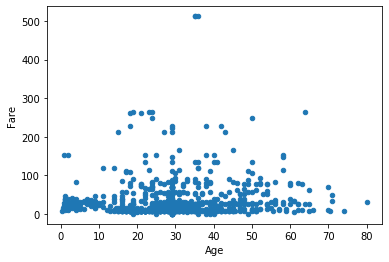

In [235]:
corr_data.plot.scatter(x='Age', y='Fare')

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [259]:
corr_data_fare = pd.DataFrame({'Survived': data['Survived'], 'Fare': data['Fare']})
corr_matrix_fare = corr_data_fare.corr()
print(corr_matrix_fare.at['Survived', 'Fare'])

mean_fare = data['Fare'].mean()
survived_passengers = data['Survived']
poor_passengers = survived_passengers[survived_passengers['Fare'] < mean_fare]

0.25730652238496193


KeyError: 'Fare'

Чаще выживали пассажиры с менее дорогими билетами

In [256]:
corr_data_class = pd.DataFrame({'Survived': data['Survived'], 'Pclass': data['Pclass']})
corr_matrix_class = corr_data_class.corr()
print(corr_matrix_class.at['Survived', 'Pclass'])

-0.33848103596101586


Зависимость между величинами слабая

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [237]:
new_feature = data['SibSp'] + data['Parch'] + 1
data.assign(Relatives = new_feature)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [238]:
data['Name'].str.split(',', expand=True)[0].mode().values[0]

'Andersson'

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

При использовании различных методов, к примеру, линейных, признаки нужно нормировать, чтобы они одинаково влияли на результат работы алгоритма.

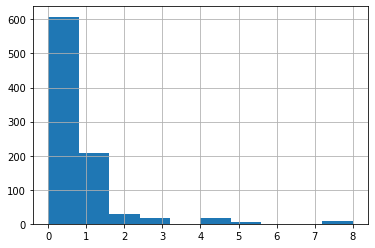

In [239]:
hist_sib_sp = data['SibSp'].hist()

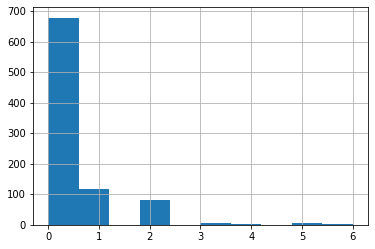

In [240]:
hist_parch = data['Parch'].hist()

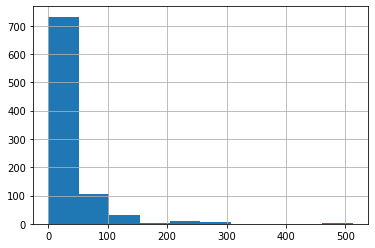

In [241]:
hist_fare = data['Fare'].hist()

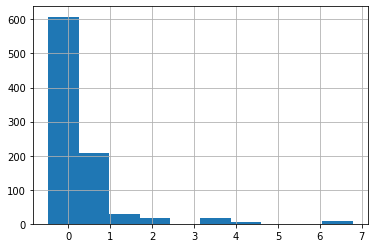

In [242]:
data['SibSp'] = (data['SibSp'] - data['SibSp'].mean()) / data['SibSp'].std()
hist_sib_sp = data['SibSp'].hist()

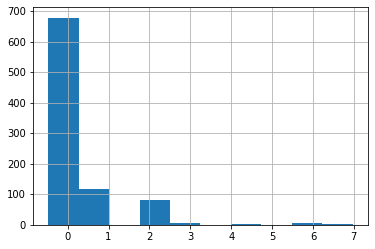

In [243]:
data['Parch'] = (data['Parch'] - data['Parch'].mean()) / data['Parch'].std()
hist_parch = data['Parch'].hist()

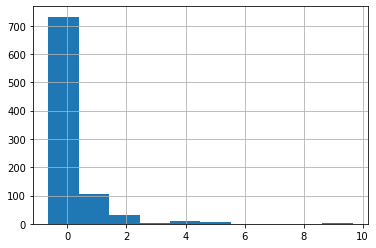

In [244]:
data['Fare'] = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
hist_fare = data['Fare'].hist()

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

Embarked и Sex

In [245]:
data.replace({'Sex': {'female': 1, 'male': 0}})

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,0.432550,-0.473408,-0.502163,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,0.432550,-0.473408,0.786404,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,-0.474279,-0.473408,-0.488580,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0.432550,-0.473408,0.420494,S
4,0,3,"Allen, Mr. William Henry",0,35.0,-0.474279,-0.473408,-0.486064,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,-0.474279,-0.473408,-0.386454,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,-0.474279,-0.473408,-0.044356,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,0.432550,2.007806,-0.176164,S
889,1,1,"Behr, Mr. Karl Howell",0,26.0,-0.474279,-0.473408,-0.044356,C


In [246]:
data.replace({'Embarked': {'C': 1, 'S': 2, 'Q': 3}})

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,0.432550,-0.473408,-0.502163,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0.432550,-0.473408,0.786404,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,-0.474279,-0.473408,-0.488580,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0.432550,-0.473408,0.420494,2
4,0,3,"Allen, Mr. William Henry",male,35.0,-0.474279,-0.473408,-0.486064,2
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,-0.474279,-0.473408,-0.386454,2
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,-0.474279,-0.473408,-0.044356,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,0.432550,2.007806,-0.176164,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,-0.474279,-0.473408,-0.044356,1


# 3 KNN своими руками (Бонусное задание: 4 балла)

### 25
В этом задании вам предстоить реализовать метод KNN для задачи классификации. Перед вами интерфейс класса, который вам предстоить реализовать. От вас требуется реализовать методы:
* `__init__(self, n_neighbors)`
* `fit(self, X, y)`
* `predict(self, X)`
* `predict_proba(self, X)`

Все ближайшие соседи должны иметь одинаковые веса при построении предсказания. В качестве метрики используйте евклидово расстояние.

Для поиска ближайших соседей можно воспользоваться готовыми структурами данных из подмодуля `sklearn.neighors`, например `KDTree`. Структуры данных из этого подмодуля принимают на вход массив точек, а потом позволяют делать запросы и быстро находить ближайших соседей.

Для проверки работы вашей реализации примените алгоритм ближайших соседей на датасете из пункта 24.
Какие метрики качества у вас получаются? Сравните свои результаты с результатами KNN из библиотеки sklearn.

In [ ]:
from sklearn.base import BaseEstimator

class MyNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors):
        super().__init__()
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
    
    def predict_proba(self, X):
        pass